# DataBase Linear regression Rodríguez-Pérez, Q. et.al.2018(SRL-Under-Review) 

In [2]:
ENV["LINES"]=1050

1050

In [3]:
using DataFrames
using GLM
using Plots
using CSV

In [3]:
pyplot()
using LaTeXStrings

In [6]:
DataGolfo = CSV.read("BMPF-14junio2017GolfoNEW.csv");
DataSUB = CSV.read("BMPF-14junio2017SUBNEW.csv");
DataTMVB = CSV.read("BMPF-14junio2017TMVBNEW.csv");

In [7]:
display(DataSUB)
display(DataGolfo)
display(DataTMVB)

,Event,Date_dd_mm_aa,Time_hh_mm_ss,Lon,Lat,Depth_km,Mw,Mo_Nm,Stress_Drop_MPa,Fc_Hz,Radius_km,Displacement_m,Er_J,Er_Mo,Strike,Dip,Rake,Place,None,Quality1,Quality2,Drop_Sd,Raduis_Sd,Fc_Sd,Er_Sd
1,1,28/08/73,09:50:39.12,-96.6,18.3,80.0,7.1,4.8e19,9.6,0.1,13.0,1.33,missing,missing,missing,missing,missing,Ver,missing,Good,C,missing,missing,missing,missing
2,26,05/12/78,06:32:26.00,-97.2867,15.6912,20.92,4.8,8.3e16,10.0,0.87,1.54,0.3728,7.13e10,8.59036e-7,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
3,27,05/12/78,13:01:30.00,-96.7983,15.6198,18.15,4.0,1.26e15,40.0,5.59,0.24,0.2325,7.01e9,5.56835e-6,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
4,28,05/12/78,23:41:33.00,-96.7743,15.6542,16.61,4.4,2.2e16,5.0,1.08,1.24,0.1508,4.9e10,2.22727e-6,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
5,29,06/12/78,02:24:24.00,-96.4485,15.5745,13.69,3.5,2.24e14,20.0,7.89,0.17,0.0824,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
6,30,06/12/78,06:47:46.00,-96.7843,16.034,28.05,3.4,1.58e14,40.0,11.17,0.12,0.1164,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
7,31,07/12/78,04:22:05.00,-96.9297,15.7507,16.59,3.5,2.24e14,7.0,5.56,0.24,0.0409,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
8,32,07/12/78,07:00:00.00,-96.862,15.9655,0.0,3.5,1.5e14,100.0,15.43,0.09,0.2108,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
9,33,07/12/78,23:52:00.00,-96.836,16.0757,27.78,3.7,4.47e14,30.0,7.18,0.19,0.1359,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
10,34,08/12/78,00:27:11.00,-96.8098,16.0417,33.77,3.6,3.16e14,40.0,8.87,0.15,0.1467,7.55e9,2.38773e-5,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing


,Event,Date_dd/mm/aa,Time_hh:mm:ss,Lon,Lat,Depth_km,Mw,Mo_Nm,Stress_Drop_MPa,Fc_Hz,Radius_km,Displacement_m,Er_J,Er_Mo,Strike,Dip,Rake,Place,None,Quality1,Quality2,Drop_Sd,Raduis_Sd,Fc_Sd,Er_Sd
1,5,11/03/78,05:18:04.40,-115.03,32.27,14.4,3.7,3.85E+14,61.57,7.24,0.134,0.2275,missing,missing,missing,missing,missing,Gcal,missing,Good,B,10.38,0.0092,0.4455,missing
2,6,11/03/78,05:40:30.40,-115.09,32.25,14.9,4.3,2.50E+15,37.59,2.4,0.308,0.2796,missing,missing,missing,missing,missing,Gcal,missing,Good,B,5.014,0.087,0.8962,missing
3,7,11/03/78,23:57:45.90,-115.11,32.24,0.0,4.7,1.09E+16,120.16,3.16,0.341,0.9946,missing,missing,missing,missing,missing,Gcal,missing,Good,B,61.49,0.0559,0.4596,missing
4,8,12/03/78,00:30:17.20,-115.09,32.32,12.5,4.7,9.52E+15,78.88,2.34,0.375,0.7183,missing,missing,missing,missing,missing,Gcal,missing,Good,B,19.9333,0.0488,0.2263,missing
5,9,13/03/78,09:11:37.20,-115.1,32.31,13.2,4.0,1.12E+15,89.35,5.2,0.18,0.3836,missing,missing,missing,missing,missing,Gcal,missing,Good,B,2.0506,0.0057,0.1768,missing
6,10,15/03/78,12:56:23.40,-115.15,32.33,0.0,2.4,3.50E+12,0.06,3.72,0.3,0.0004,missing,missing,missing,missing,missing,Gcal,missing,Good,B,0.0141,0.0587,0.6364,missing
7,11,15/03/78,16:17:16.90,-115.11,32.32,0.0,2.9,2.22E+13,0.42,3.55,0.29,0.0029,missing,missing,missing,missing,missing,Gcal,missing,Good,B,0.0707,0.0184,0.2192,missing
8,12,15/03/78,20:13:17.60,-115.09,32.34,9.3,3.3,8.57E+13,21.65,9.55,0.12,0.0631,missing,missing,missing,missing,missing,Gcal,missing,Good,B,3.9509,0.0192,1.2783,missing
9,13,16/03/78,01:51:09.80,-115.08,32.34,10.5,3.8,4.42E+14,36.78,6.61,0.17,0.1549,missing,missing,missing,missing,missing,Gcal,missing,Good,B,6.5784,0.0361,1.0748,missing
10,14,17/03/78,02:42:12.30,-115.12,32.31,14.0,2.8,1.39E+13,0.84,5.75,0.19,0.004,missing,missing,missing,missing,missing,Gcal,missing,Good,B,0.2404,0.0417,1.0465,missing


,Event,Date_dd/mm/aa,Time_hh:mm:ss,Lon,Lat,Depth_km,Mw,Mo_Nm,Stress_Drop_MPa,Fc_Hz,Radius_km,Displacement_m,Er_J,Er_Mo,Strike,Dip,Rake,Place,None,Quality1,Quality2,Drop_Sd,Raduis_Sd,Fc_Sd,Er_Sd
1,2,12/07/74,02:41:52.50,-99.2,19.21,7.0,3.8,5.34e14,53.3,5.47,0.16,0.2212,missing,missing,missing,missing,missing,TMVB,missing,Fair,B,missing,missing,missing,missing
2,3,25/03/76,23:05:00.50,-99.33,20.4807,4.0,5.0,4.5e16,0.7,0.4,3.0,0.0531,missing,missing,242,64,-174,TMVB,missing,Good,B,missing,missing,missing,missing
3,4,04/10/76,06:59:16.41,-99.1458,20.4927,4.0,5.1,5.6e16,0.7,0.45,3.0,0.066,missing,missing,291,76,-25,TMVB,missing,Good,B,missing,missing,missing,missing
4,42,22/02/79,09:16:33,-100.176,19.8936,8.19,5.5,1.75e17,8.236,0.635,2.02,0.4551,missing,missing,280,66,-48,TMVB,T,Good,B,2.6,0.33941,0.10607,missing
5,43,22/02/79,10:38:00,-100.191,19.9166,8.53,3.6,2.69e14,0.56,1.96,0.701,0.0058,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.57,0.16,0.78,missing
6,44,22/02/79,09:57:00,-100.202,19.8738,4.96,3.4,1.38e14,0.06,1.26,1.005,0.0014,missing,missing,missing,missing,missing,TMVB,T,Fair,B,missing,missing,missing,missing
7,45,22/02/79,10:26:00,-100.177,19.8531,7.86,3.1,4.9e13,0.116,2.21,0.62,0.0014,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.087681,0.24,0.86267,missing
8,46,22/02/79,10:28:00,-100.135,19.8287,3.32,3.3,7.9e13,0.518,2.5,0.79,0.0013,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.70661,0.67175,2.1213,missing
9,47,22/02/79,12:15:00,-100.147,19.8853,9.72,3.3,9.02e13,0.613,3.16,0.4,0.006,missing,missing,missing,missing,missing,TMVB,T,Good,B,missing,missing,missing,missing
10,48,22/02/79,19:45:00,-100.171,19.8352,4.96,3.9,7.95e14,0.405,1.17,1.12,0.0067,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.38857,0.25796,0.31213,missing


In [33]:
DataTo[:Mw]=round.(collect(skipmissing(DataTo[:Mw])),1);
DataGolfo[:Mw]=round.(collect(skipmissing(DataGolfo[:Mw])),1);
DataSUB[:Mw]=round.(collect(skipmissing(DataSUB[:Mw])),1);
DataTMVB[:Mw]=round.(collect(skipmissing(DataTMVB[:Mw])),1);

In [34]:
# Remove and Fc -->> NA
DataTo2=DataTo[find(.~ismissing.(DataTo[:,:Fc_Hz])), :];
SUB=DataSUB[find(.~ismissing.(DataSUB[:,:Fc_Hz])), :];
TMVB=DataTMVB[find(.~ismissing.(DataTMVB[:,:Fc_Hz])), :];


In [35]:
ReMwFc = fit(LinearModel,@formula(Fc_Hz ~ Mw),DataTo2)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: freq_esc_ ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   12.8683  0.201861  63.7481   <1e-99
Magnitud     -2.28621 0.0672685 -33.9863   <1e-99


In [36]:
ToMwfc(x)=coef(ReMwFc)[2] * x + coef(ReMwFc)[1];
#x = collect(1:8);
x = DataTo2[:Mw];
TocorrMwFc = ToMwfc(x);

In [37]:
sub = "MSZ";
golf = "GBC";
TM = "TMVB";


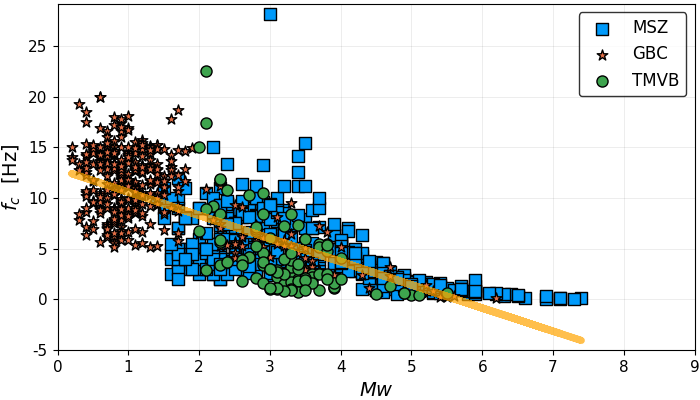

In [40]:
scatter((SUB[:Mw]),(SUB[:Fc_Hz]),lab=sub, m=(8,:rect))
scatter!((DataGolfo[:Mw]),(DataGolfo[:Fc_Hz]),lab=golf,m=(8,:star5))
scatter!((TMVB[:Mw]),(TMVB[:Fc_Hz]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
plot!(x,TocorrMwFc,linewidth=5,linealpha=0.7,lab="",c=:orange)
#PyPlot.savefig("MwvsFc-Regress.pdf",dpi=400)

In [41]:
DataTo2[:LogRa] = log10.(collect(skipmissing(DataTo2[:Radius_km])));
ReMwRad = fit(LinearModel,@formula(LogRa ~ Mw),DataTo2)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Magnitud

Coefficients:
             Estimate  Std.Error  t value Pr(>|t|)
(Intercept)  -1.35505  0.0158166 -85.6729   <1e-99
Magnitud     0.279396 0.00527074  53.0088   <1e-99


In [42]:
ToMwRa(x)=coef(ReMwRad)[2] * x + coef(ReMwRad)[1];
x = DataTo2[:Mw];
TocorrMwR = ToMwRa(x);

In [43]:
SUB[:LogRa] = log10.(collect(skipmissing(SUB[:Radius_km])));
DataGolfo[:LogRa] = log10.(collect(skipmissing(DataGolfo[:Radius_km])));
TMVB[:LogRa] = log10.(collect(skipmissing(TMVB[:Radius_km])));


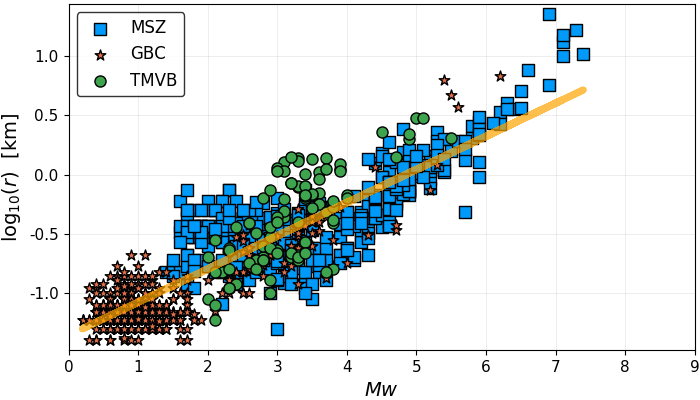

In [47]:
scatter((SUB[:Mw]),(SUB[:LogRa]),lab=sub, m=(8,:rect))
scatter!((DataGolfo[:Mw]),(DataGolfo[:LogRa]),lab=golf,m=(8,:star5))
scatter!((TMVB[:Mw]),(TMVB[:LogRa]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
plot!(x,TocorrMwR,linewidth=5,linealpha=0.7,lab="",c=:orange)
#PyPlot.savefig("MwvsR-Regress.pdf",dpi=400)

In [48]:
SUB = SUB[(SUB[:Displacement_m]) .> 0,:]; # Remove Despla <  0
SUB[:LogD] = log10.(collect(skipmissing(SUB[:Displacement_m])));

DataGolfo = DataGolfo[(DataGolfo[:Displacement_m]) .> 0,:]; # Remove Despla <  0
DataGolfo[:LogD] = log10.(collect(skipmissing(DataGolfo[:Displacement_m])));

TMVB = TMVB[(TMVB[:Displacement_m]) .> 0,:]; # Remove Despla <  0
TMVB[:LogD] = log10.(collect(skipmissing(TMVB[:Displacement_m])));

In [49]:
Total = DataTo2[(DataTo2[:Displacement_m]) .> 0,:]; # Remove Despla <  0
Total[:LogD] = log10.(collect(skipmissing(Total[:Displacement_m])));

ToReMwD = fit(LinearModel,@formula(LogD ~ Mw),Total)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Magnitud

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -4.94495 0.0320427 -154.324   <1e-99
Magnitud     0.861594 0.0105989  81.2906   <1e-99


In [50]:
ToMwD(x)=coef(ToReMwD)[2] * x + coef(ToReMwD)[1];
x = Total[:Mw];
TocorrMwD = ToMwD(x);


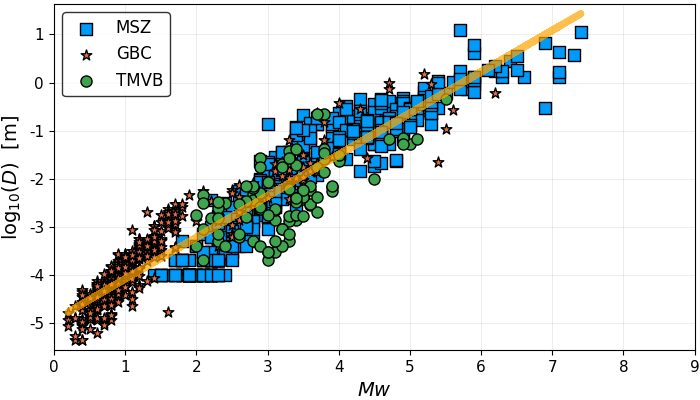

In [53]:
scatter((SUB[:Mw]),(SUB[:LogD]),lab=sub, m=(8,:rect))
scatter!((DataGolfo[:Mw]),(DataGolfo[:LogD]),lab=golf,m=(8,:star5))
scatter!((TMVB[:Mw]),(TMVB[:LogD]),lab=TM,m=(8,:circle),
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",14))
plot!(x,TocorrMwD,linewidth=5,linealpha=0.7,lab="",c=:orange)
#PyPlot.savefig("MwvsDRegress.pdf",dpi=400)